In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

The price shown is in U.S. Dollars per pound

In [ ]:
df_prices=pd.read_csv('data/prices.csv',sep=';')
df_prices["Date"] = pd.to_datetime(df_prices["Date"], format="%m/%d/%Y")


df_prices["Value"] = (
    df_prices["Value"]
    .str.replace(",", ".", regex=False)
    .astype(float)
)

df_prices["month"] = df_prices["Date"].dt.month
df_prices["year"] = df_prices["Date"].dt.year

df_prices

,Date,Value
0,1969-06-02,0.3725
1,1969-06-03,0.3725
2,1969-06-04,0.3725
3,1969-06-05,0.3725
4,1969-06-06,0.3725
...,...,...
14320,2025-12-24,3.4497
14321,2025-12-25,3.4510
14322,2025-12-26,3.4836
14323,2025-12-29,3.5115


# Seasonality

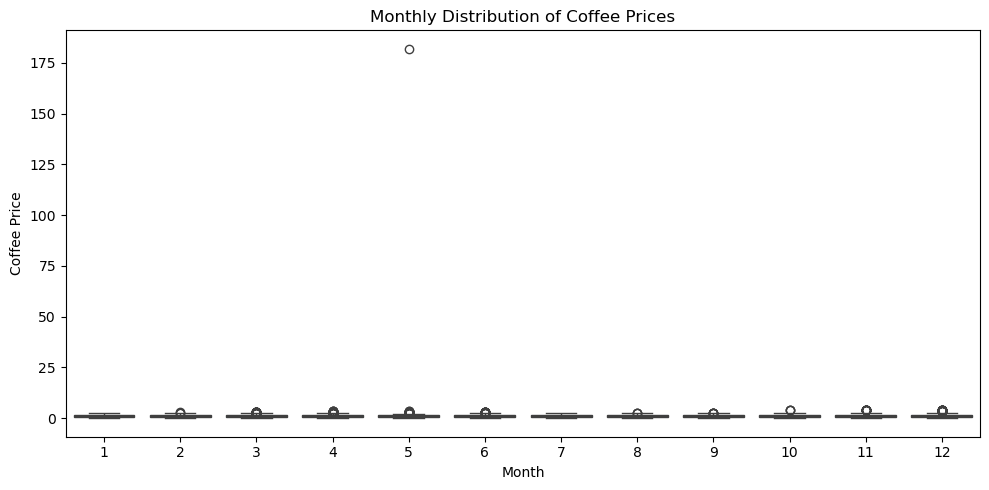

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_prices,
    x="month",
    y="Value"
)

plt.xlabel("Month")
plt.ylabel("Coffee Price")
plt.title("Monthly Distribution of Coffee Prices")
plt.tight_layout()
plt.show()

In [37]:
df_prices[df_prices['Value']>150]

,Date,Value,month,year
11356,2014-05-26,181.9,5,2014


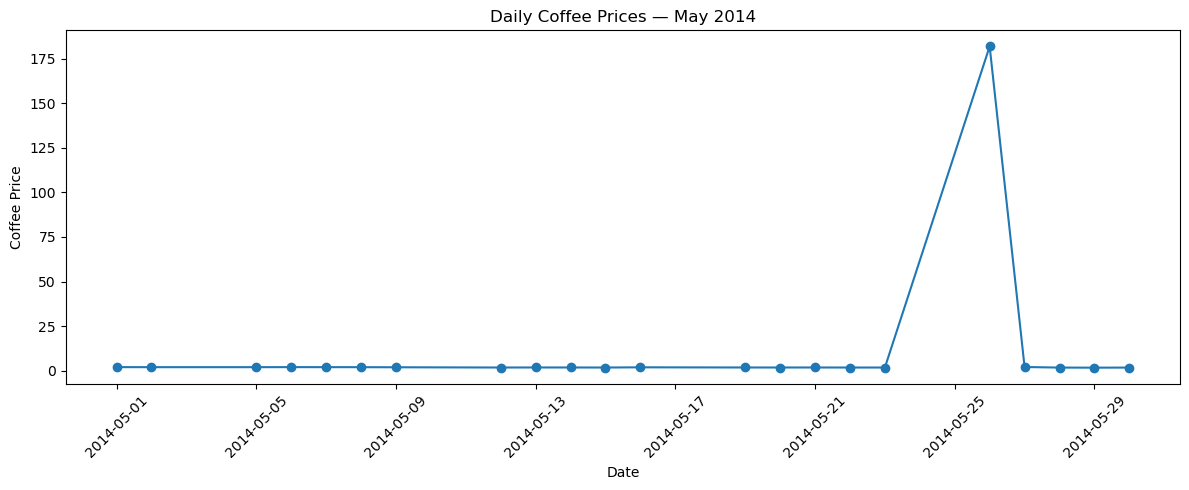

In [38]:
df_may_2014 = df_prices[
    (df_prices["Date"].dt.year == 2014) &
    (df_prices["Date"].dt.month == 5)
].copy()

plt.figure(figsize=(12, 5))

plt.plot(
    df_may_2014["Date"],
    df_may_2014["Value"],
    marker="o"
)

plt.xlabel("Date")
plt.ylabel("Coffee Price")
plt.title("Daily Coffee Prices — May 2014")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
mask = df_prices["Date"] == pd.Timestamp("2014-05-26")

df_prices.loc[mask, "Value"] = df_prices.loc[mask, "Value"] / 100

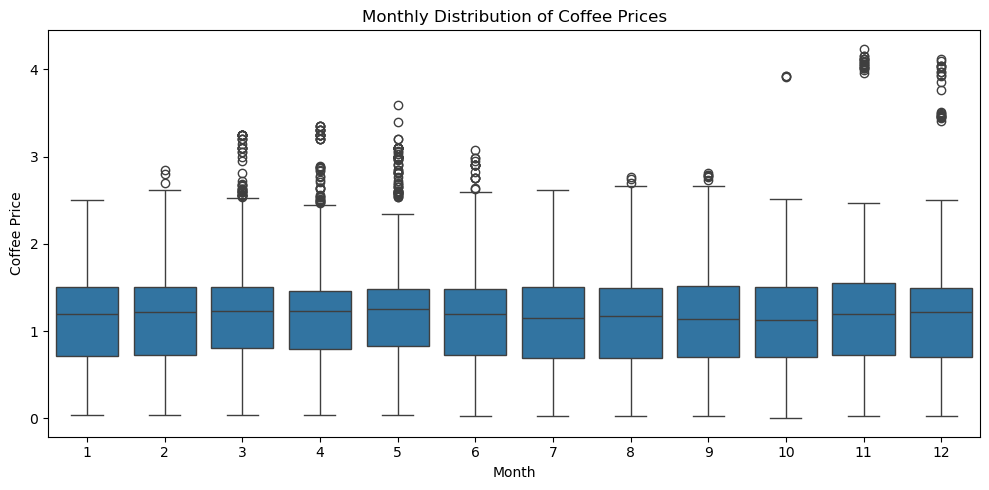

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_prices,
    x="month",
    y="Value"
)

plt.xlabel("Month")
plt.ylabel("Coffee Price")
plt.title("Monthly Distribution of Coffee Prices")
plt.tight_layout()
plt.show()

The monthly boxplots indicate that coffee prices exhibit relatively stable medians and comparable variability throughout the year. Distributions are consistently right-skewed, with frequent upper outliers, suggesting that extreme price increases occur more often than sharp drops. No strong seasonal pattern is observed in monthly price levels, reinforcing the use of robust statistics such as the median for analysis.

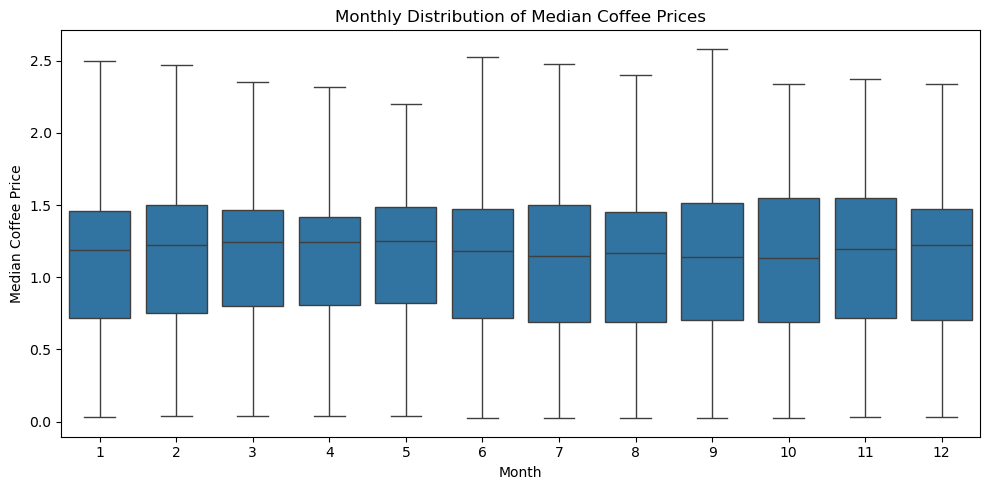

In [28]:
df_monthly = (
    df_prices
    .groupby(["year", "month"], as_index=False)
    .agg(price_median=("Value", "median"))
)

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_monthly,
    x="month",
    y="price_median",
    showfliers=False
)

plt.xlabel("Month")
plt.ylabel("Median Coffee Price")
plt.title("Monthly Distribution of Median Coffee Prices")
plt.tight_layout()
plt.show()


By aggregating daily prices into monthly medians, the influence of short-term volatility and extreme values is substantially reduced. The resulting boxplots show remarkably similar distributions across months, suggesting the absence of strong seasonal effects in coffee price levels. Variability appears to be driven primarily by interannual factors rather than within-year seasonality.


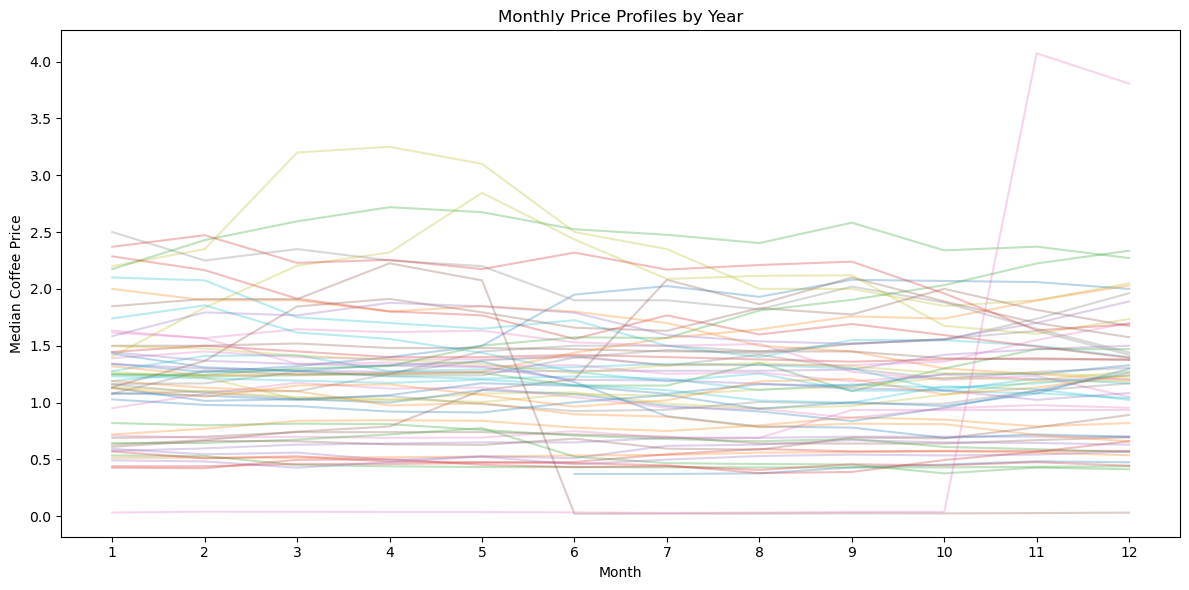

In [ ]:

pivot = df_monthly.pivot(index="month", columns="year", values="price_median")

plt.figure(figsize=(12, 6))

for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], alpha=0.3)

plt.xlabel("Month")
plt.ylabel("Median Coffee Price")
plt.title("Monthly Price Profiles by Year")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


C:\Users\ferna\AppData\Local\Temp\ipykernel_26968\833434443.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


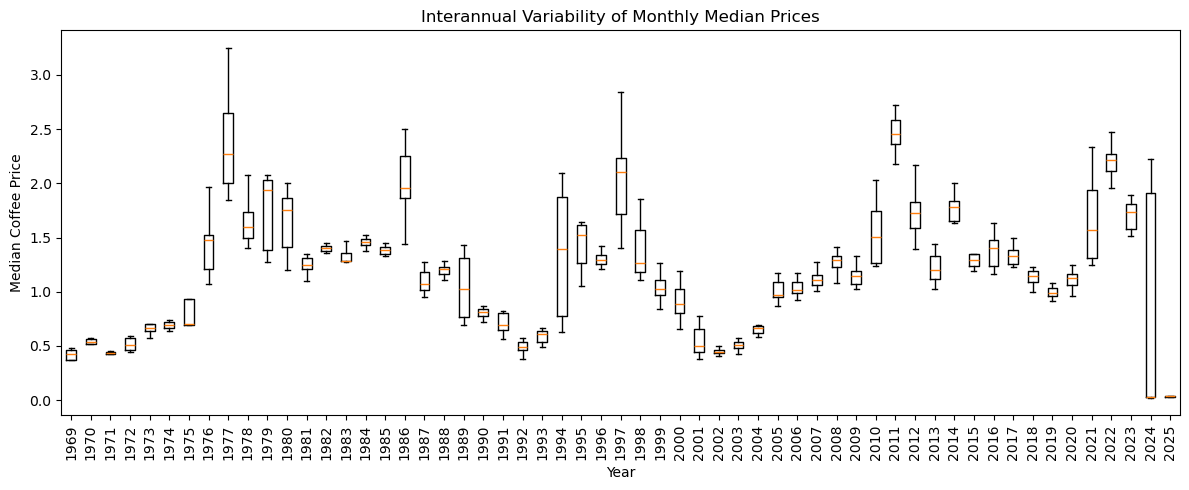

In [42]:
plt.figure(figsize=(12, 5))
plt.boxplot(
    [df_monthly[df_monthly["year"] == y]["price_median"] for y in df_monthly["year"].unique()],
    labels=df_monthly["year"].unique(),
    showfliers=False
)

plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Median Coffee Price")
plt.title("Interannual Variability of Monthly Median Prices")
plt.tight_layout()
plt.show()


The analysis shows that coffee price variability is primarily driven by interannual factors, rather than by within-year seasonality. Monthly median price distributions display large shifts in price levels across years, while monthly profiles within each year remain relatively smooth, with substantial vertical displacement between years. This indicates that price dynamics are dominated by year-specific conditions, not recurring seasonal patterns.

Major price peaks observed in 1977, 1986, 1997, and 2011 are consistent with this interpretation and are well documented in official sources. These episodes are mainly associated with global supply shocks caused by extreme climatic events (such as Brazilian frosts and El Niño episodes), institutional changes in international coffee market regulation, and global commodity market cycles. Official explanations and historical analyses are provided by the FAO, International Coffee Organization (ICO), World Bank, and NOAA.


# Price Turbulence

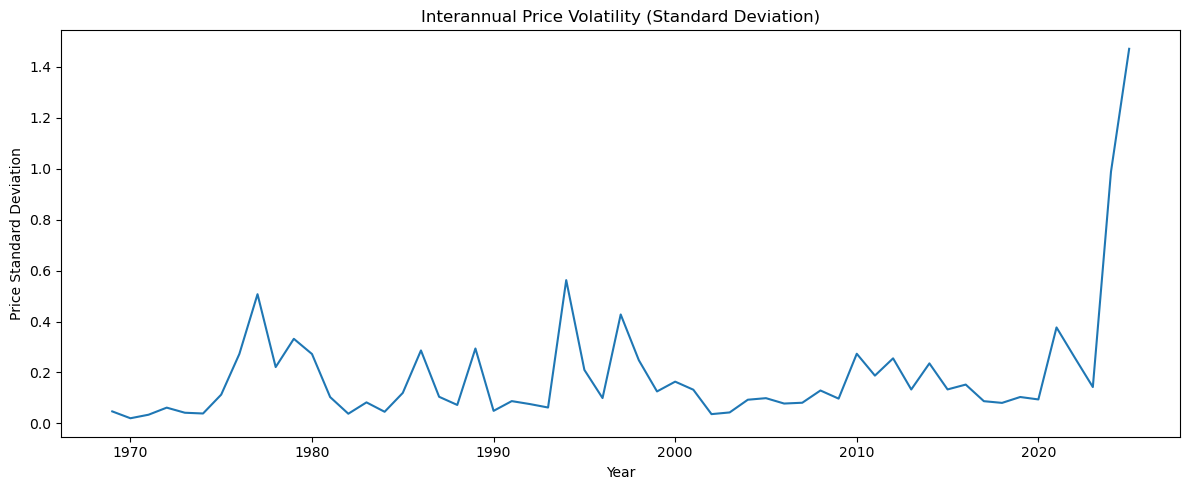

In [44]:
df_yearly_vol = (
    df_prices
    .groupby(df_prices["Date"].dt.year)
    .agg(
        price_mean=("Value", "mean"),
        price_std=("Value", "std")
    )
    .reset_index()
    .rename(columns={"Date": "year"})
)

plt.figure(figsize=(12, 5))
plt.plot(df_yearly_vol["year"], df_yearly_vol["price_std"])
plt.xlabel("Year")
plt.ylabel("Price Standard Deviation")
plt.title("Interannual Price Volatility (Standard Deviation)")
plt.tight_layout()
plt.show()


Interannual price volatility exhibits clear regime shifts, with pronounced spikes concentrated in historically turbulent periods. These peaks align with documented supply shocks and market disruptions. The apparent surge in volatility at the end of the series is attributable to incomplete recent data.


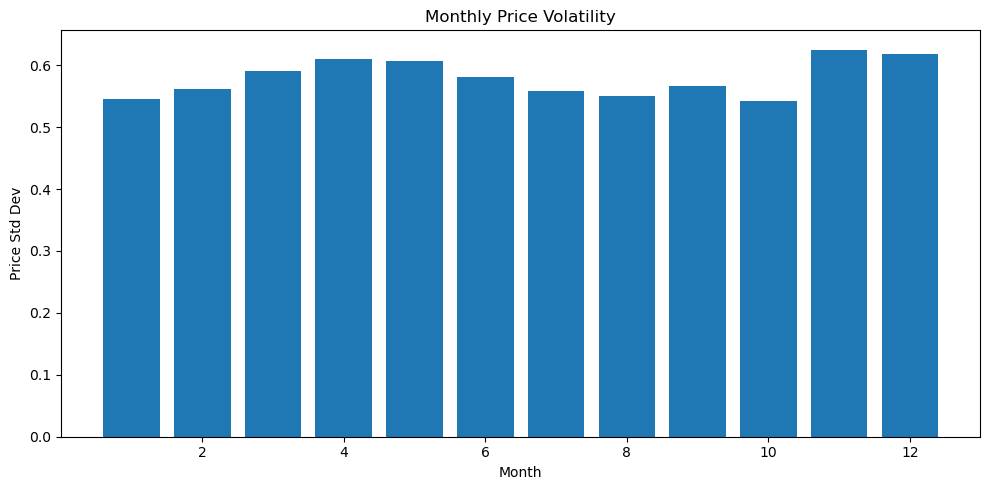

In [46]:
monthly_vol = (
    df_prices
    .groupby("month")["Value"]
    .std()
)

plt.figure(figsize=(10, 5))
plt.bar(monthly_vol.index, monthly_vol.values)
plt.xlabel("Month")
plt.ylabel("Price Std Dev")
plt.title("Monthly Price Volatility")
plt.tight_layout()
plt.show()



Monthly price volatility shows limited variation across the calendar year, with only minor differences between months. When compared to interannual volatility, these variations are small, indicating that price instability is primarily driven by year-specific shocks rather than by within-year seasonal effects.
